In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
#List of import for this project
import numpy as np #Used for math calculations.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/gdrive/My Drive/Online_MLW : July 2020/Data'

In [5]:
raw_data = pd.read_csv (path+'/Chennai_house_univariate.csv')

In [6]:
raw_data.head() #Displays first 5(default) data from data set

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000


In [7]:
raw_data.head(10) #Displays first 10 data from data set

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000
5,654.79,1260000
6,510.77,680000
7,587.07,1000000
8,577.37,950000
9,793.34,1740000


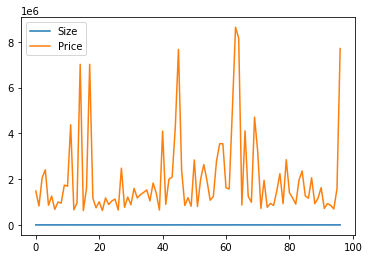

In [8]:
raw_data.plot()

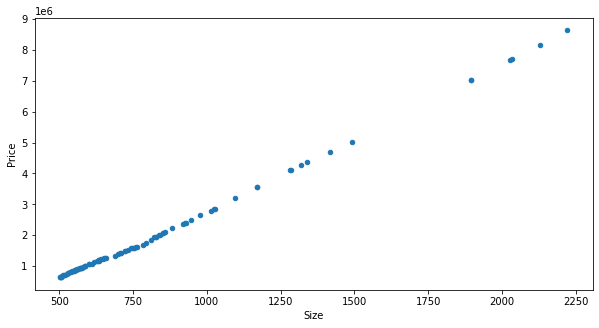

In [9]:
raw_data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize=(10,5))

Day 2

In [10]:
data = (raw_data-raw_data.mean())/(raw_data.max()-raw_data.min()) #Data Preprocessing
data.head()

,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922
2,0.020808,0.008636
3,0.066977,0.052331
4,-0.153242,-0.141177


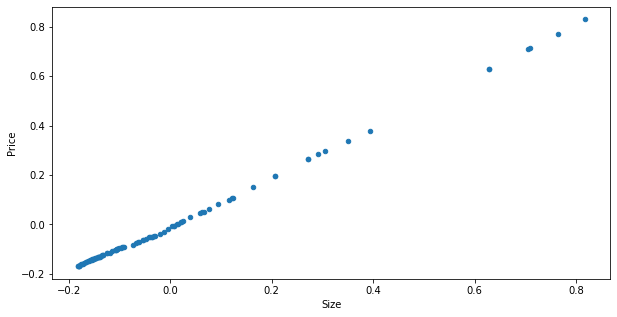

In [11]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize = (10,5))

In [12]:
data.describe()

,Size,Price
count,9.700000e+01,9.700000e+01
mean,-2.724052e-16,4.578239e-18
std,2.253063e-01,2.218128e-01
min,-1.823988e-01,-1.698907e-01
25%,-1.427623e-01,-1.324375e-01
50%,-9.142937e-02,-8.999060e-02
75%,2.435361e-02,1.238143e-02
max,8.176012e-01,8.301093e-01


In [13]:
data.shape

(97, 2)

In [14]:
data.shape[0] #No of rows

97

In [15]:
data.shape[1] #No od columns

2

In [16]:
data.insert(0,'One', 1) #Adding bias term to the table

In [17]:
data.head()

,One,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


To Find Squared Error
 

In [18]:
cols = data.shape[1]

In [19]:
x = data.iloc[:,0:cols-1]

In [20]:
y = data.iloc[:, cols-1:cols]

In [21]:
theta = np.matrix([10,10])

In [22]:
x = np.matrix(x)

In [23]:
y = np.matrix(y)

In [24]:
theta.shape

(1, 2)

In [25]:
x.shape #Mean and Size


(97, 2)

In [26]:
y.shape #Price

(97, 1)

Squared Error Function

In [27]:
def computeError(X,Y,theta):
    inner = np.power(((X*theta.T)-Y), 2)
    return np.sum(inner)/(2*len(x))

Call the function to calculate the error

In [63]:
computeError(x,y,theta)

52.04227733164413

###Day 3###

In [132]:
learn_rate = 1
iters = 250
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))   # creating a temporary matrix to update the values of theta
  parameters = theta.shape[1]         # finding the number of parameters
  cost = []            # creating a list to track the cost at all iters

  for i in range(iters):      #for each iteration
    error = (x*theta.T)-y     #error

    for j in range(parameters): #update the value of theta
      gradient = np.multiply(error,x[:,j])
      temp[0,j]= theta[0,j] - ((learn_rate/len(x))*np.sum(gradient))      #assign it to the temp matrix

    theta= temp   #simultaneously update the values of all the theta values
    
    cost_iter = computeError(x,y,theta) #find the cost for the iteration

    cost.append(cost_iter) 
    
  return theta,cost

In [133]:
new_theta,cost = gradientDescent(x,y,theta,learn_rate,iters)
print(new_theta)
print('Final theta_0 is {}'.format(new_theta[0,0]))

[[2.73835937e-16 9.83409437e-01]]
Final theta_0 is 2.7383593674388483e-16


In [134]:
print('Final theta_1 is {}'.format(new_theta[0,1]))

Final theta_1 is 0.9834094365416951


In [135]:
print(cost)

[1.8422310503366273, 1.6617803387969696, 1.4990057094345268, 1.3521756984137194, 1.2197284477530166, 1.1002550915527423, 0.9924847696279508, 0.8952711091336072, 0.8075800303846301, 0.7284787471590412, 0.6571258444784158, 0.5927623283211484, 0.5347035520626777, 0.48233193376272687, 0.4350903868319889, 0.39247639419905145, 0.3540366629433739, 0.31936230253466086, 0.2880844753886726, 0.2598704734736295, 0.2344201792333485, 0.21146287318129448, 0.19075435420733625, 0.17207434196537663, 0.15522413371057223, 0.14002449066148973, 0.1263137314040396, 0.1139460120563736, 0.10278977490054164, 0.09272634897871615, 0.08364868776826677, 0.07546023050810254, 0.06807387506399827, 0.061411051407084666, 0.055400885849920437, 0.04997944714997208, 0.04508906646116357, 0.04067772389969573, 0.036698495198921724, 0.03310905256724479, 0.029871214439571053, 0.02695053933294034, 0.024315959486102517, 0.021939450385995502, 0.019795732665816957, 0.017862003203724615, 0.016117692561812075, 0.014544246185193722, 0

In [136]:
computeError(x,y,new_theta)

5.477119992898457e-05

In [137]:
model_price = x * new_theta.T

Text(0.5, 1.0, 'Predicted Price Vs Size')

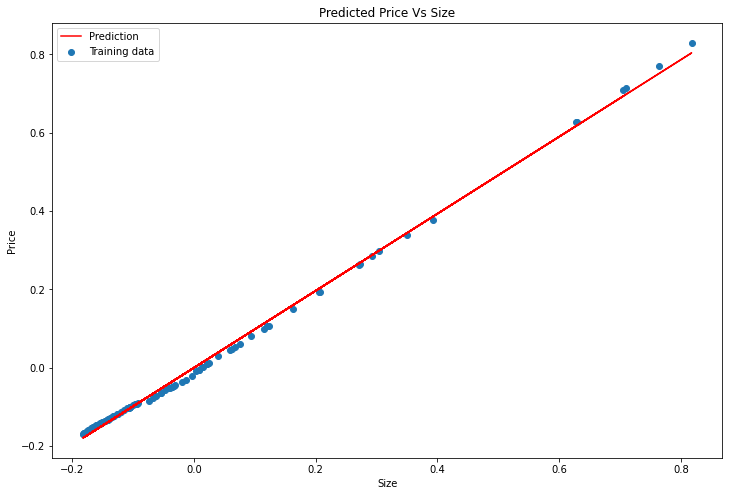

In [138]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(data.Size,model_price,'r',label="Prediction")
ax.scatter(data.Size,data.Price,label="Training data")
ax.legend(loc = 0)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price Vs Size')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error Vs Iterations')

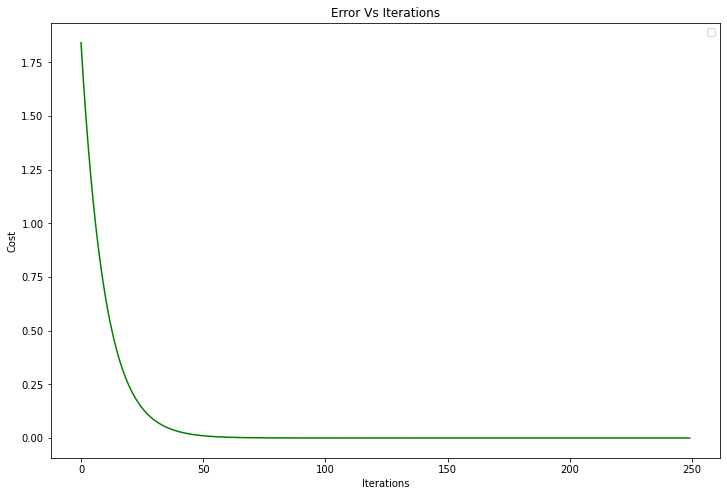

In [139]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'g')
ax.legend(loc=1)
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [140]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(model_price,y)
Accuracy = 1 - Error

print('Error = {} %'.format((round(Error*100,2))))
print('Accuracy = {} %'.format((round(Accuracy*100,2))))

Error = 0.94 %
Accuracy = 99.06 %


In [141]:
def predict(new_theta,accuracy):
  size = float(input("Enter the size of the house in Sqt:"))
  size = (size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price = (new_theta[0,0] + (new_theta[0,1]*size))
  Predicted_price = (price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  Price_at_max_Accuracy = (Predicted_price*(1/accuracy))
  Price_range = Price_at_max_Accuracy - Predicted_price
  return Predicted_price, Price_range, Price_at_max_Accuracy

In [146]:
Predicted_price, Price_range, Price_at_max_Accuracy = predict(new_theta,Accuracy)
print('Your house cost is '+str(round(Predicted_price*(1/100000), 2))+' Lakhs (+ or -)'+str(round(Price_range, 2)))

Enter the size of the house in Sqt:543.69
Your house cost is 7.42 Lakhs (+ or -)7078.83
